# RMSE vs. RMSLE

* Regression model에서 예측된 결과에 대한 정확도(Accuracy)를 평가하기 위한 방법



* 참조 :

https://programmers.co.kr/learn/courses/21/lessons/943#
https://www.slideshare.net/KhorSoonHin/rmsle-cost-function 
https://www.saedsayad.com/model_evaluation_r.htm

### (1) 결론 : 둘 다  0에 가까울수록 정확도가 높은 모델

### (2) 평가방식의 수식 확인

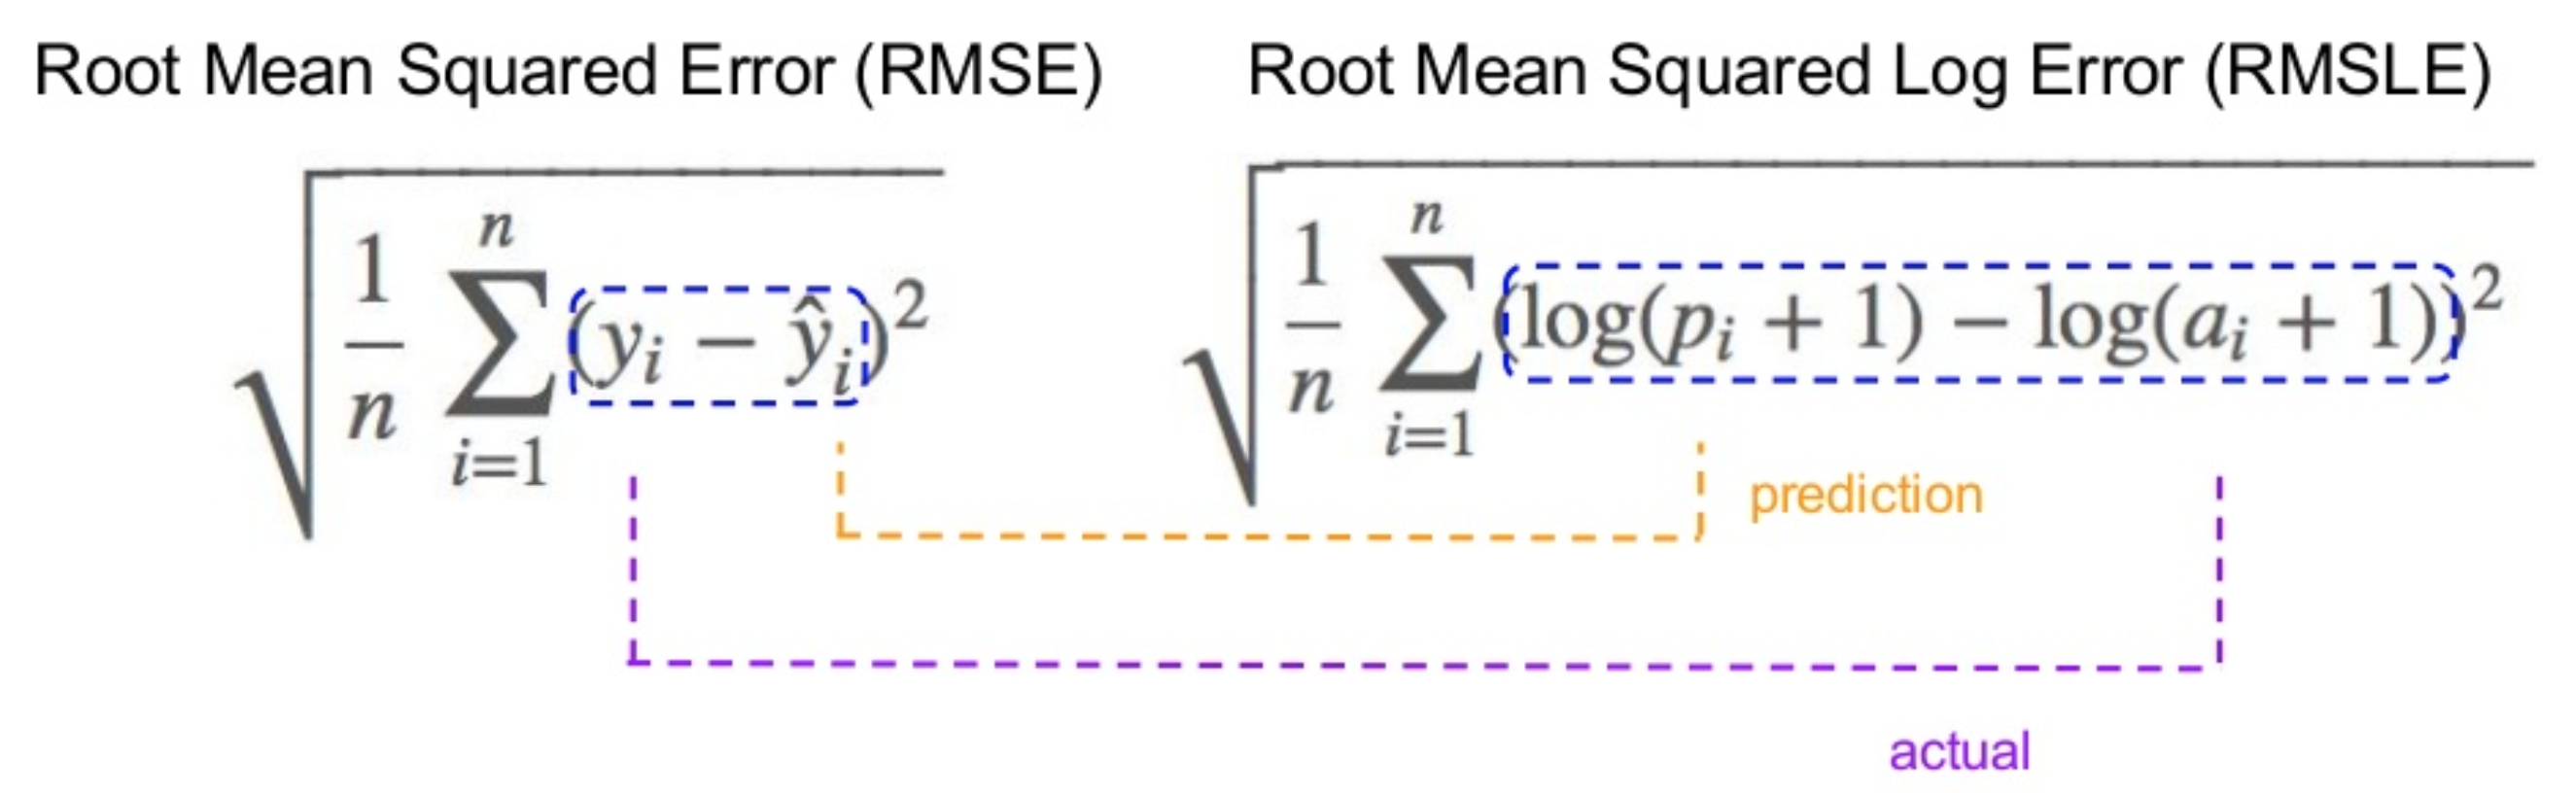

In [16]:
from IPython.display import Image
Image('RMSE vs RMSLE.png', width=700)

두 방법 모두 예측치와 실제치의 차이에 대해 제곱의 평균 값에 대해 루트를 씌워서 계산하는 방식

=>  단순히 차이를 더하면 차이의 값이 양수, 음수인 것들이 서로 상쇄시키기 떄문에 제곱을 통해 양수로 만들어줌

=> 그리고 루트를 씌워줌으로써 제곱되었던 단위를 원래대로 만들어줌 

### (3) 두 방식의 차이 : RMSLE는 과소예측에 보다 큰 패널티를 주기 위한 평가방식

* RMSE에서는 과대예측이든, 과소예측이든 차이의 절대값이 같으면 평가값은 동일


* 하지만 RMSLE에서는 과소예측의 경우 평가값이 더 높게 나옴(정확도가 낮게 평가됨)

 => 아래 그림에서처럼 로그는 x 값이 작아질수록 로그 값의 감소폭이 커짐
 
 => 예측값과 실제값 차이의 절대값이 같더라도, 과소예측되었을 때,  log(예측값+1) - log(실제값+1) 의 제곱값이 크게 됨
 
 => 결국, RMSLE의 값이 커지게 됨

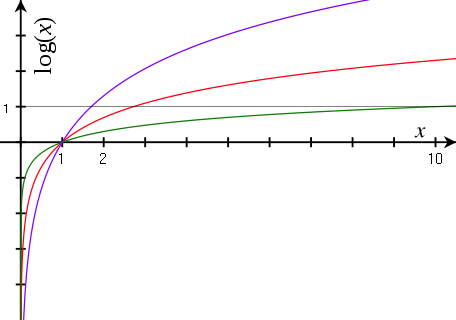

In [17]:
Image('log function.png')

### (4) RMSLE 평가방식 코드

In [18]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태를 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제값에 1을 더해주고 로그를 씌워준다
    log_predict = np.log(predicted_values+1)
    log_actual = np.log(actual_values+1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

다른 방법

In [23]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y, y_pred)**0.5

NameError: name 'y' is not defined

### (5) Regression model과 관련된 그 외 평가 방법

#### MAE(Mean Absolute Error)

* 예측치와 절대치 차이의 평균
* RMSE와 비슷하지만, RMSE는 차이에 제곱을 해줌으로써 큰 오차 값에 더 가중을 두었음

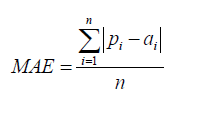

In [19]:
Image('MAE.png')

#### RAE(Relative Absolute Error)


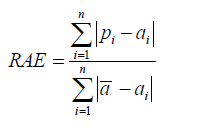

In [22]:
Image('RAE.png')

#### RSE(Relative Squared Error)

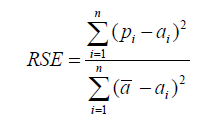

In [24]:
Image('RSE.png')

* RAE나 RSE의 경우에는 error가 서로 다른 단위로 측정되었을 때 활용 가능